1. Load the Data 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snså

df = pd.read_csv("../data/Banking-Dataset/Comprehensive_Banking_Database.csv")
print(df.head())


2. Inspect Structure and Types


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

In [8]:
df.describe(include='all')

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
count,5000.000000,5000,5000,5000.000000,5000,5000,5000,5.000000e+03,5000,5000,...,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000,5000,5000,5000.000000
unique,NaN,50,50,NaN,3,5000,40,NaN,2139,2,...,NaN,365,365,NaN,NaN,365,3,2,365,NaN
top,NaN,Timothy,Adams,NaN,Female,Address_1,San Jose,NaN,emily.adams@kag.com,Savings,...,NaN,11/3/2023,1/14/2023,NaN,NaN,11/20/2023,Suggestion,Pending,12/19/2023,NaN
freq,NaN,124,121,NaN,1727,1,163,NaN,8,2507,...,NaN,28,24,NaN,NaN,29,1689,2504,27,NaN
mean,2500.500000,NaN,NaN,43.469800,NaN,NaN,NaN,1.945880e+10,NaN,NaN,...,124.370134,NaN,NaN,4966.161800,2500.500000,NaN,NaN,NaN,NaN,0.880000
std,1443.520003,NaN,NaN,15.145672,NaN,NaN,NaN,1.443520e+03,NaN,NaN,...,72.340102,NaN,NaN,2901.410915,1443.520003,NaN,NaN,NaN,NaN,0.475021
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,1.945879e+10,NaN,NaN,...,0.070000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,-1.000000
25%,1250.750000,NaN,NaN,30.000000,NaN,NaN,NaN,1.945880e+10,NaN,NaN,...,62.180000,NaN,NaN,2475.250000,1250.750000,NaN,NaN,NaN,NaN,1.000000
50%,2500.500000,NaN,NaN,43.000000,NaN,NaN,NaN,1.945880e+10,NaN,NaN,...,123.080000,NaN,NaN,4950.500000,2500.500000,NaN,NaN,NaN,NaN,1.000000
75%,3750.250000,NaN,NaN,57.000000,NaN,NaN,NaN,1.945880e+10,NaN,NaN,...,186.125000,NaN,NaN,7483.250000,3750.250000,NaN,NaN,NaN,NaN,1.000000


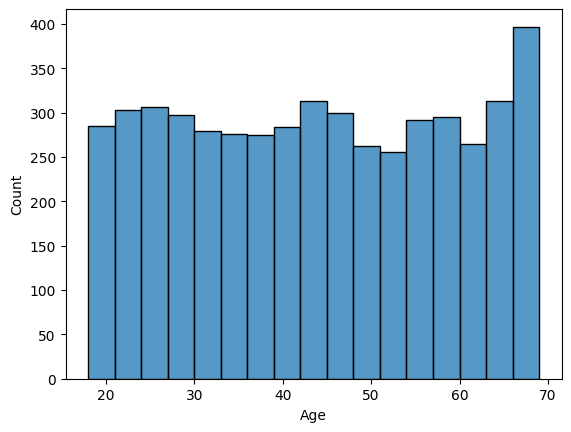

In [7]:
sns.histplot(df['Age'])  # Replace with your actual amount column
plt.show()

3. Missing Value Analysis 	•	Purpose: Know what needs imputation or removal.

In [9]:
# Total and percent missing
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(pd.DataFrame({"Missing": missing, "Missing %": missing_percent}))

                                   Missing  Missing %
Customer ID                              0        0.0
First Name                               0        0.0
Last Name                                0        0.0
Age                                      0        0.0
Gender                                   0        0.0
Address                                  0        0.0
City                                     0        0.0
Contact Number                           0        0.0
Email                                    0        0.0
Account Type                             0        0.0
Account Balance                          0        0.0
Date Of Account Opening                  0        0.0
Last Transaction Date                    0        0.0
TransactionID                            0        0.0
Transaction Date                         0        0.0
Transaction Type                         0        0.0
Transaction Amount                       0        0.0
Account Balance After Transa

4. Check for Duplicates 	•	Purpose: Duplicate data can skew results or inflate certain classes.

In [10]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


5. Target/Class Distribution 	•	Purpose: Understand if the problem is imbalanced, which affects modeling and metric choices.

Loan Status
Approved    0.342
Closed      0.332
Rejected    0.326
Name: proportion, dtype: float64


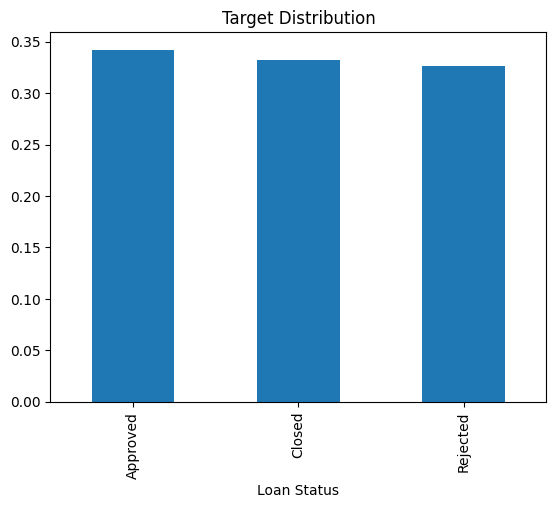

In [13]:
target_column = "Loan Status"  
if target_column in df.columns:
    print(df[target_column].value_counts(normalize=True))
    df[target_column].value_counts(normalize=True).plot(kind='bar', title='Target Distribution')
    plt.show()
else:
    print(f"Target column '{target_column}' not found in the DataFrame.")

6. Feature Distribution Plots
 Purpose: Spot outliers, skews, and data ranges.

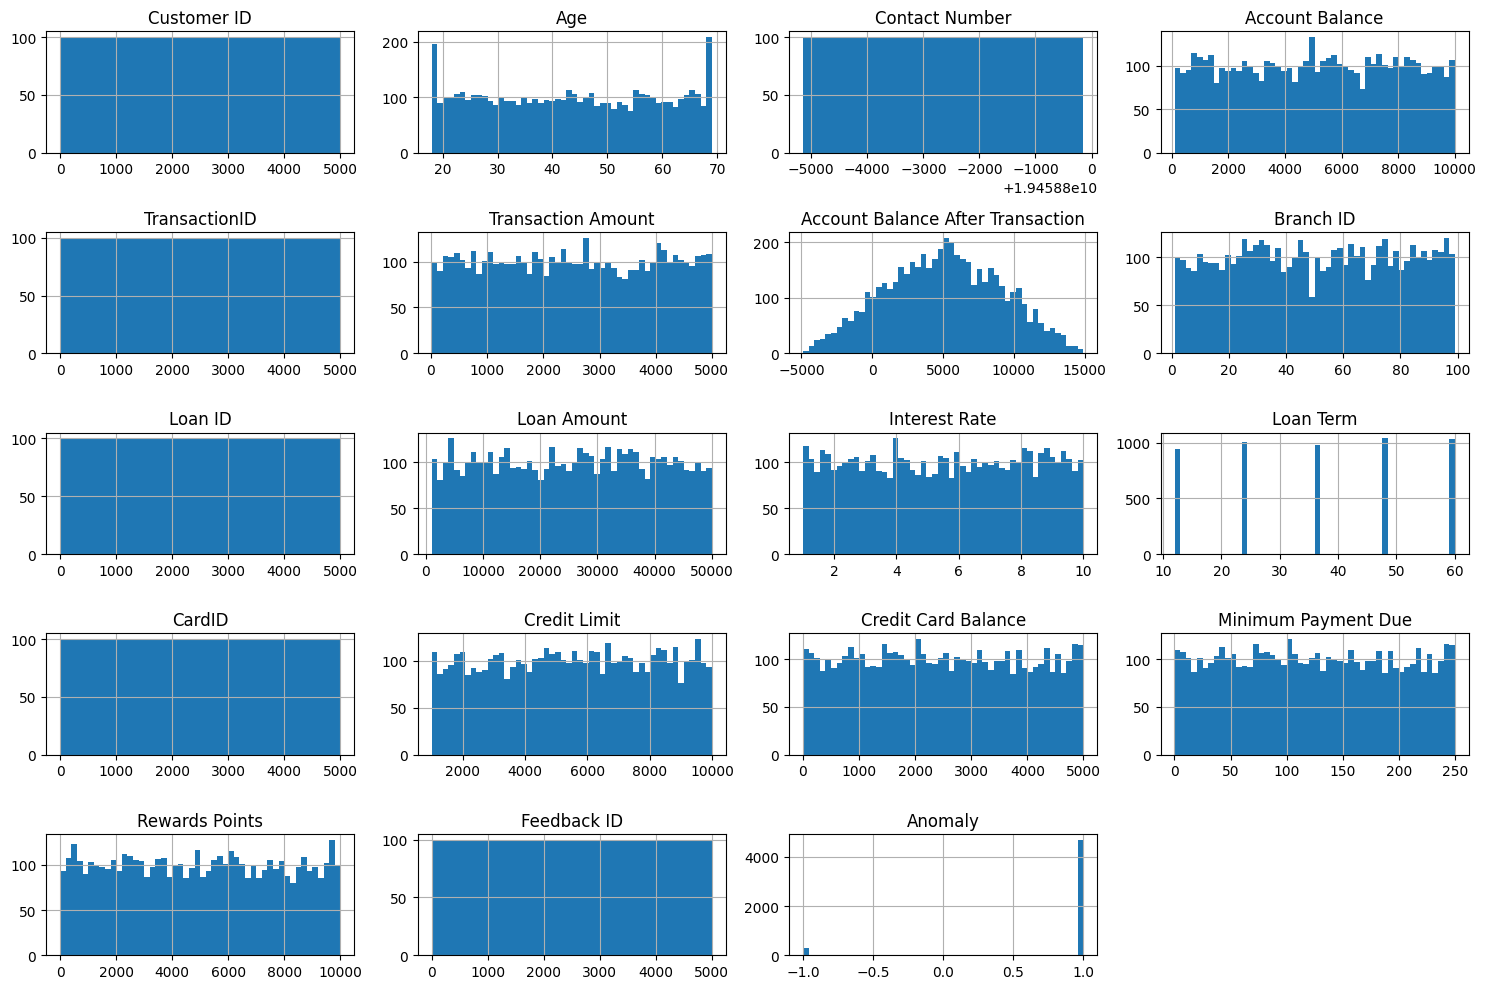

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numeric columns
df.hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()



6. Feature Distribution Plots 	•	Purpose: Spot outliers, skews, and data ranges.

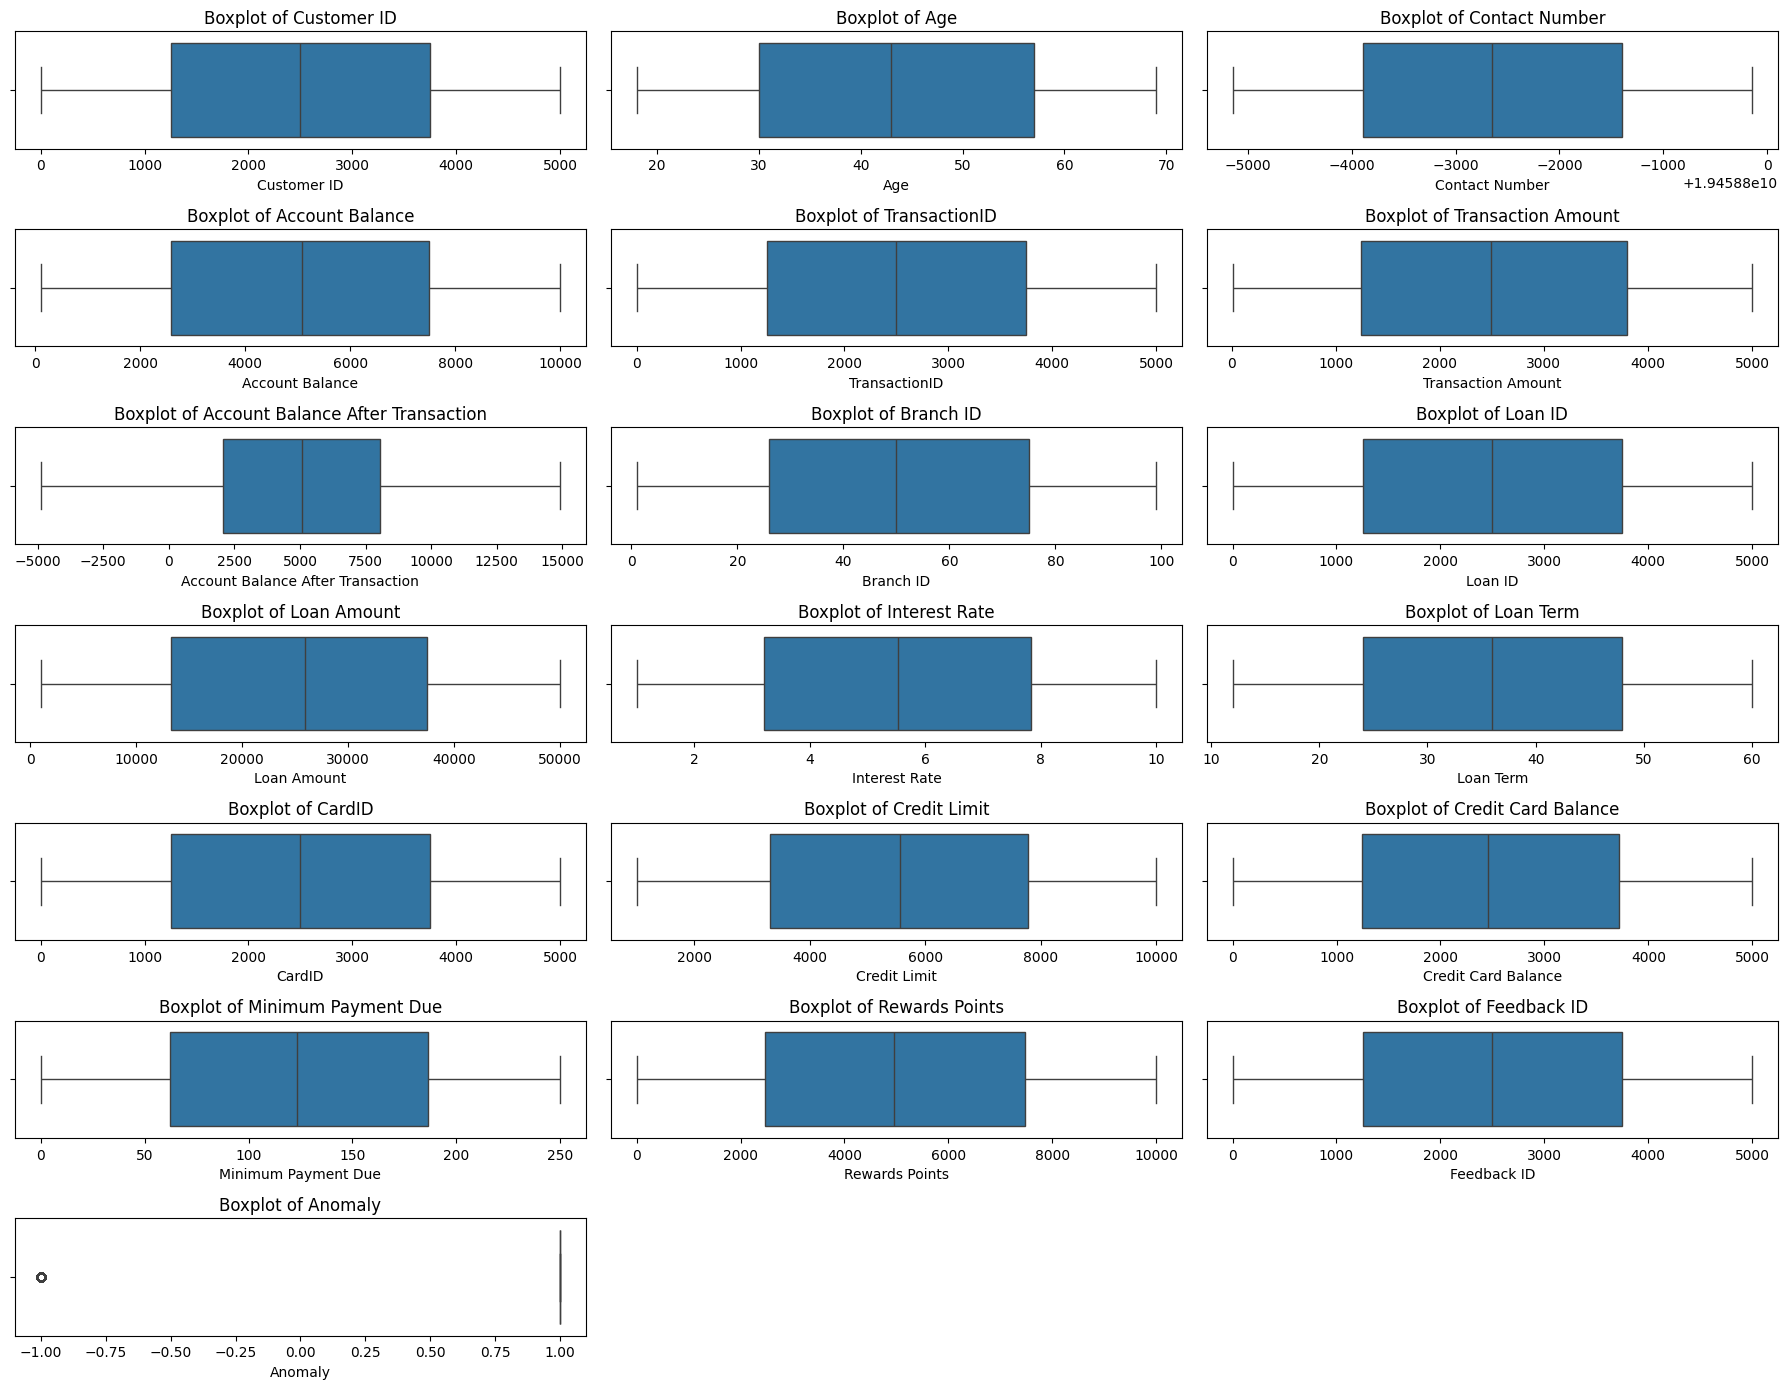

In [27]:
# Boxplots for spotting outliers with tight layout, displayed as a grid
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 2 * n_rows))

for i, col in enumerate(numeric_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

7. Correlation and Relationships 	•	Purpose: Find highly correlated features and potential data leakage.

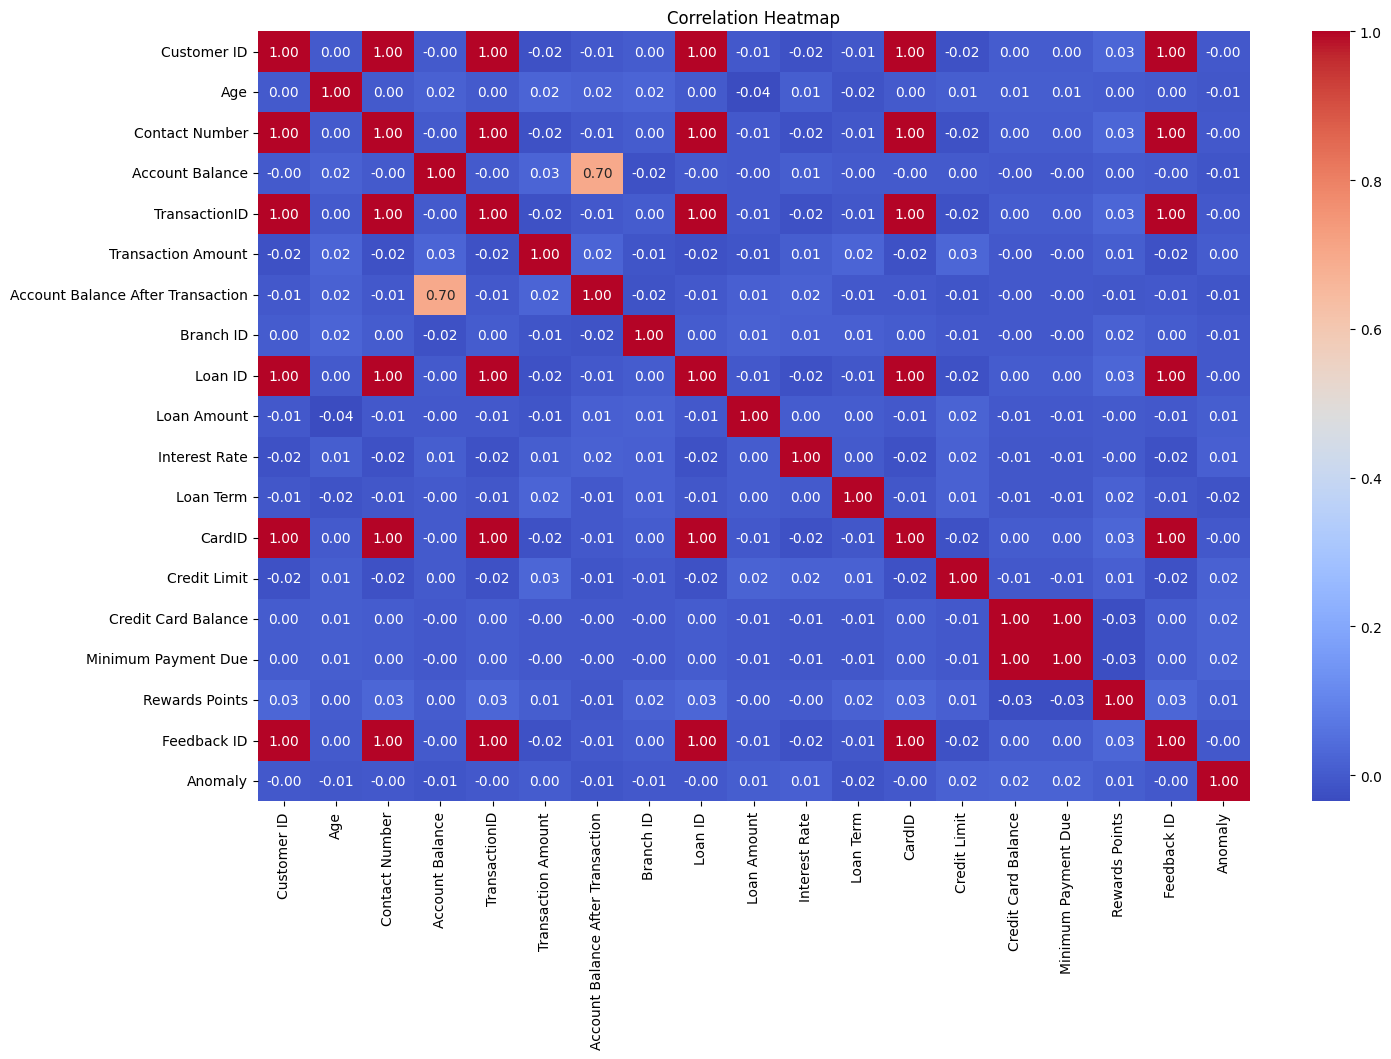

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

8. Categorical Feature Inspection 	•	Purpose: Understand cardinality and value distribution—helps with encoding later.

Gender
Female    1727
Other     1639
Male      1634
Name: count, dtype: int64


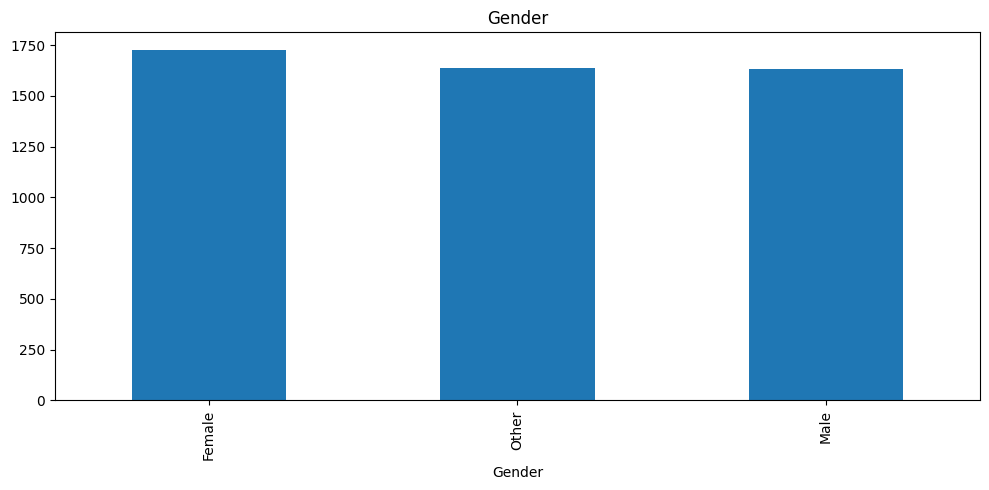

In [ ]:
if 'cat_cols' in locals():
    col_to_inspect = 'Gender'
    if col_to_inspect in cat_cols:
        print(df[col_to_inspect].value_counts())
        df[col_to_inspect].value_counts().plot(kind='bar', title=col_to_inspect, figsize=(10, 5))
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col_to_inspect}' not found in cat_cols.")
else:
    print("cat_cols is not defined.")